<a href="https://colab.research.google.com/github/ProfessorPatrickSlatraigh/CST3512/blob/main/CST3512_Class08_DataFrames_Review_NYC_DOH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CST3512 - Information and Data Management II**

**Class #08**    


## Pandas Review

## Setup and preliminaries

To read and process files, there is a  very powerful, and widely used Python library, called pandas. This notebook will import the **pandas** library in Python, and also import the following libraries to use with pandas data:

* **numpy** - for calculations on the data   
* **matplotlib** - for generating plots    



In [1]:
import pandas as pd
import numpy as np

import matplotlib 

*note: for additional plotting functionality, the library **Seaborn** may be imported as well.*

# Data Types and Conversions

## Loading Data

### From CSV Files

We can use a `!curl` command to access a file from *GitHub* and load a copy of that file to our currentw working directory. 

This notebook uses a dataset with [restaurant inspection results in NYC](https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j) which is available online from the City of New York.

Fetching a file to download in a Google Colab notebook results in the downloaded file residing in the '**/content/**' folder in the active Colab session.  That is a volatile copy which will not persist after the Colab session is closed. 

This notebook fetchs the data using the [Linux '!curl' command](https://www.geeksforgeeks.org/curl-command-in-linux-with-examples/) by executing the following command with the parameters **"-o"** and **"restaurant.csv"** to specify a file name to use when saving the result:

In [2]:
# Fetches the most recent dataset
!curl 'https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD' -o restaurant.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  101M    0  101M    0     0   869k      0 --:--:--  0:01:59 --:--:--  908k


To be able to read and process this file within Python, the pandas library has a very convenient method `read_csv` which reads the file, and returns back a variable that contains its contents.  The following code creates a dataframe **restaurants** with the results of the Pandas **'.read_csv()'** function.

In [3]:
restaurants = pd.read_csv(
    "restaurant.csv",
    encoding="utf_8",
    dtype="unicode",
    parse_dates=True,
    infer_datetime_format=True,
    low_memory=False,
)

Using **'.read_csv()'** to read a CSV file (or TSV file), results in an `Dataframe` object, which is made up of rows and columns. DataFrame columns are accessed the same way as elements from a dictionary. Using the **restaurant** DataFrame object, the first five rows and the columns of data can be displayed with the **'.head(5)'** method:

In [4]:
restaurants.head(5)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point
0,50124507,NaN,Manhattan,100,PEARL STREET,10004,19175179005,NaN,01/01/1900,NaN,...,NaN,40.704279137344,-74.009784953715,101,01,000900,1000855,1000300019,MN25,NaN
1,50101317,THE FLO KISS,Manhattan,1802,65TH STREET TRANVERSE,NaN,6466453020,NaN,01/01/1900,NaN,...,NaN,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN
2,50123379,Tonchin Brooklyn,Brooklyn,109,NORTH 3 STREET,11249,9283008287,NaN,01/01/1900,NaN,...,NaN,40.716690566674,-73.961909825586,301,34,055500,3329978,3023500026,BK73,NaN
3,41395502,CITI FIELD STAND 335,Queens,000,126 St & ROOSEVELT AVENUE,NaN,7185958100,American,06/07/2016,No violations were recorded at the time of thi...,...,Cycle Inspection / Initial Inspection,0,0,NaN,NaN,NaN,NaN,4,NaN,NaN
4,50104650,CHITO GVRITO,Manhattan,173,3 AVENUE,10003,6463771791,NaN,01/01/1900,NaN,...,NaN,40.734830714192,-73.986042896551,106,02,004800,1019535,1008970044,MN21,NaN


The **'.read_csv()'** method has many options.  See the [online documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.parsers.read_csv.html) for details.



---



## Data Assessment and Transformations

### More DataFrame Exploration

The data types can be displayed for each column (variable) with **'.dtypes'**

In [5]:
restaurants.dtypes

CAMIS                    object
DBA                      object
BORO                     object
BUILDING                 object
STREET                   object
ZIPCODE                  object
PHONE                    object
CUISINE DESCRIPTION      object
INSPECTION DATE          object
ACTION                   object
VIOLATION CODE           object
VIOLATION DESCRIPTION    object
CRITICAL FLAG            object
SCORE                    object
GRADE                    object
GRADE DATE               object
RECORD DATE              object
INSPECTION TYPE          object
Latitude                 object
Longitude                object
Community Board          object
Council District         object
Census Tract             object
BIN                      object
BBL                      object
NTA                      object
Location Point           object
dtype: object

The method **'.describe()'**  yields a quick overview of the data in the dataframe.

In [6]:
restaurants.describe()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point
count,242350,240765,242350,241867,242322,238974,242328,238187,242350,238187,...,238187,242075,242075,238310,238310,238310,237106,241658,238310,0
unique,28003,21291,6,7546,2418,230,25507,87,1638,5,...,30,22874,22874,69,51,1179,19821,19520,193,0
top,41187577,DUNKIN,Manhattan,1,BROADWAY,10003,7185958100,American,01/01/1900,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,0,0,105,03,087100,4000000,1,MN17,NaN
freq,87,2860,91229,1270,8626,5729,297,44742,4163,224942,...,143745,3348,3348,17658,20722,2131,1253,2039,13055,NaN


To describe output list as a column of variables with the count, # unique values, top, and frequency as columns, transpose the result from the **'.describe()'** method using **'.T'**.

In [7]:
# Same as above, but the .T command transposes the table
restaurants.describe().T

,count,unique,top,freq
CAMIS,242350,28003,41187577,87
DBA,240765,21291,DUNKIN,2860
BORO,242350,6,Manhattan,91229
BUILDING,241867,7546,1,1270
STREET,242322,2418,BROADWAY,8626
ZIPCODE,238974,230,10003,5729
PHONE,242328,25507,7185958100,297
CUISINE DESCRIPTION,238187,87,American,44742
INSPECTION DATE,242350,1638,01/01/1900,4163
ACTION,238187,5,Violations were cited in the following area(s).,224942




---



The `object` type is a string as a result of reading a CSV. Many of these objects may be more useful changed to other data types. The **`pd.to_numeric`** and **`pd.to_datetime`** functions are two methods for changing dataframe columns to another type as the following code demonstrates. 

### Converting Data Types to Numeric

The `object` type is a string. To convert an object to numeric, use the **`pd.to_numeric()`** function, as shown below:

In [8]:
restaurants["SCORE"] = pd.to_numeric(restaurants["SCORE"])
restaurants["Latitude"] = pd.to_numeric(restaurants["Latitude"])
restaurants["Longitude"] = pd.to_numeric(restaurants["Longitude"])
restaurants.dtypes

CAMIS                     object
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                   object
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
Latitude                 float64
Longitude                float64
Community Board           object
Council District          object
Census Tract              object
BIN                       object
BBL                       object
NTA                       object
Location Point            object
dtype: object



---



###  Converting Data to Dates

Converting appropriate columns into the date data type follows.

* What do you recall about datetime values in Pandas?    
* What are two types of datetime value?



In [9]:
restaurants["GRADE DATE"] = pd.to_datetime(restaurants["GRADE DATE"])
restaurants["RECORD DATE"] = pd.to_datetime(restaurants["RECORD DATE"])
restaurants["INSPECTION DATE"] = pd.to_datetime(restaurants["INSPECTION DATE"])
restaurants.dtypes

CAMIS                            object
DBA                              object
BORO                             object
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION              object
INSPECTION DATE          datetime64[ns]
ACTION                           object
VIOLATION CODE                   object
VIOLATION DESCRIPTION            object
CRITICAL FLAG                    object
SCORE                           float64
GRADE                            object
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
Latitude                        float64
Longitude                       float64
Community Board                  object
Council District                 object
Census Tract                     object
BIN                              object
BBL                              object


#### Note


In tricky cases, there may be a need to pass the `format` parameter, specifying the formatting of the date. To understand first how to [parse dates using  Python conventions](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).




---



### Converting Data to Categorical Variables

This is less important, but sometimes variables are best to be formatted as "Categorical". This is most commonly useful when we have variables that have an implicit order (e.g., the A/B/C grade of the restaurant).  Where this categorization is applicable, it can be helpful in charting (bar charts, etc.)  It is also important to recognize categorical variables if planning to conduct correlation analysis at some point.

In [10]:
restaurants["BORO"] = pd.Categorical(restaurants["BORO"], ordered=False)
restaurants["GRADE"] = pd.Categorical(
    restaurants["GRADE"], categories=["A", "B", "C"], ordered=True
)
restaurants["VIOLATION CODE"] = pd.Categorical(
    restaurants["VIOLATION CODE"], ordered=False
)
restaurants["CRITICAL FLAG"] = pd.Categorical(
    restaurants["CRITICAL FLAG"], ordered=False
)
restaurants["ACTION"] = pd.Categorical(restaurants["ACTION"], ordered=False)
restaurants["CUISINE DESCRIPTION"] = pd.Categorical(
    restaurants["CUISINE DESCRIPTION"], ordered=False
)

restaurants["INSPECTION TYPE"] = pd.Categorical(
    restaurants["INSPECTION TYPE"], ordered=False
)

restaurants.dtypes

CAMIS                            object
DBA                              object
BORO                           category
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION            category
INSPECTION DATE          datetime64[ns]
ACTION                         category
VIOLATION CODE                 category
VIOLATION DESCRIPTION            object
CRITICAL FLAG                  category
SCORE                           float64
GRADE                          category
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                category
Latitude                        float64
Longitude                       float64
Community Board                  object
Council District                 object
Census Tract                     object
BIN                              object
BBL                              object




---



## Descriptive Statistics



### Descriptive Statistics for Numeric Variables


#### Basic descriptive statistics for numeric variables

Given that SCORE is a numeric variable, more detailed descriptive statistics for the variable are available using the **`.describe()`** method:

In [11]:
restaurants["SCORE"].describe()

count    230636.000000
mean         21.762210
std          16.419326
min           0.000000
25%          11.000000
50%          17.000000
75%          28.000000
max         172.000000
Name: SCORE, dtype: float64

### Descriptive Statistics for Dates


In [12]:
restaurants[["INSPECTION DATE", "GRADE DATE", "RECORD DATE"]].describe(datetime_is_numeric=True)

,INSPECTION DATE,GRADE DATE,RECORD DATE
count,242350,112243,242350
mean,2018-07-17 12:29:55.380235264,2020-06-13 08:51:23.395846400,2022-09-27 00:00:00
min,1900-01-01 00:00:00,2013-07-30 00:00:00,2022-09-27 00:00:00
25%,2019-06-26 00:00:00,2019-06-12 00:00:00,2022-09-27 00:00:00
50%,2020-01-23 00:00:00,2019-12-18 00:00:00,2022-09-27 00:00:00
75%,2022-03-09 00:00:00,2022-02-02 00:00:00,2022-09-27 00:00:00
max,2022-09-24 00:00:00,2022-09-24 00:00:00,2022-09-27 00:00:00


In addition to running a list of columns, we can look at each column individually.

In [13]:
restaurants["INSPECTION DATE"].describe(datetime_is_numeric=True)

count                           242350
mean     2018-07-17 12:29:55.380235264
min                1900-01-01 00:00:00
25%                2019-06-26 00:00:00
50%                2020-01-23 00:00:00
75%                2022-03-09 00:00:00
max                2022-09-24 00:00:00
Name: INSPECTION DATE, dtype: object

In [ ]:
restaurants["GRADE DATE"].describe(datetime_is_numeric=True)

In [ ]:
restaurants["RECORD DATE"].describe(datetime_is_numeric=True)

### Descriptive Statistics for Categorical/string columns

Quick statistics about the common values that appear in each column are available with the **`.value_counts()`** method:

In [14]:
restaurants["DBA"].value_counts()

DUNKIN                      2860
SUBWAY                      1714
STARBUCKS                   1221
MCDONALD'S                  1125
KENNEDY FRIED CHICKEN        782
                            ... 
Bella mama Rose                1
CAFE JOIE                      1
JIMMY JOHNS                    1
KISSAKI UWS                    1
CHEESE LOVERS RESTAURANT       1
Name: DBA, Length: 21291, dtype: int64

In [15]:
restaurants["BORO"].value_counts()

Manhattan        91229
Brooklyn         62322
Queens           57570
Bronx            22991
Staten Island     8161
0                   77
Name: BORO, dtype: int64

In [16]:
restaurants["CUISINE DESCRIPTION"].value_counts()

American          44742
Chinese           23280
Pizza             14832
Coffee/Tea        12438
Latin American    10408
                  ...  
Czech                18
Lebanese              9
Basque                7
New French            6
Armenian              4
Name: CUISINE DESCRIPTION, Length: 87, dtype: int64



---



# Basic Data Manipulation Techniques

## Selecting a subset of the columns -- `filter()`

It is possible in a dataframe to specify the column(s) to keep, and get back another dataframe with just that subset of the columns as the result using 
[the **`.filter()`** method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html)

In [ ]:
restaurants

In [17]:
restaurants.filter( 
    items = ["DBA", "GRADE", "GRADE DATE"] 
)

,DBA,GRADE,GRADE DATE
0,NaN,NaN,NaT
1,THE FLO KISS,NaN,NaT
2,Tonchin Brooklyn,NaN,NaT
3,CITI FIELD STAND 335,A,2016-06-07
4,CHITO GVRITO,NaN,NaT
...,...,...,...
242345,GREAT WALL CHINESE RESTAURANT,A,2021-08-12
242346,RED LOBSTER,NaN,NaT
242347,BOARD AND BRUSH STATEN ISLAND,A,2019-01-26
242348,THE RANCH RESTAURANT & BAR,NaN,NaT


In [18]:
columns = ["GRADE DATE", "VIOLATION CODE", "DBA", "SCORE"]

# Notice the use of "chain notation" below
# Chain notation means putting parentheses around
# the command and then having each operation in its
# own line
(
  restaurants
  .filter( items = columns )
  .head(10)
)


,GRADE DATE,VIOLATION CODE,DBA,SCORE
0,NaT,NaN,NaN,NaN
1,NaT,NaN,THE FLO KISS,NaN
2,NaT,NaN,Tonchin Brooklyn,NaN
3,2016-06-07,NaN,CITI FIELD STAND 335,0.0
4,NaT,NaN,CHITO GVRITO,NaN
5,NaT,NaN,ZEST LOUNGE,NaN
6,NaT,NaN,5 BAR KARAOKE,NaN
7,NaT,NaN,Lamonte,NaN
8,NaT,NaN,NaN,NaN
9,NaT,NaN,FLATBUSH COUNTER,NaN


Use the **`like`** option in `filter()` to find all the column names that include a certain string. For example, to get all the columns that include the string `DATE`:

In [19]:
restaurants.filter(
    like = 'DATE'
)

,INSPECTION DATE,GRADE DATE,RECORD DATE
0,1900-01-01,NaT,2022-09-27
1,1900-01-01,NaT,2022-09-27
2,1900-01-01,NaT,2022-09-27
3,2016-06-07,2016-06-07,2022-09-27
4,1900-01-01,NaT,2022-09-27
...,...,...,...
242345,2021-08-12,2021-08-12,2022-09-27
242346,2020-01-02,NaT,2022-09-27
242347,2019-01-26,2019-01-26,2022-09-27
242348,2020-01-14,NaT,2022-09-27


The functionality of `filter()` is greatly expanded with the use of **regular expressions**:

In [20]:
restaurants.filter(
    regex = r'^C' # all the columns that start with C
)

,CAMIS,CUISINE DESCRIPTION,CRITICAL FLAG,Community Board,Council District,Census Tract
0,50124507,NaN,Not Applicable,101,01,000900
1,50101317,NaN,Not Applicable,NaN,NaN,NaN
2,50123379,NaN,Not Applicable,301,34,055500
3,41395502,American,Not Applicable,NaN,NaN,NaN
4,50104650,NaN,Not Applicable,106,02,004800
...,...,...,...,...,...,...
242345,41576658,Chinese,Critical,209,18,005002
242346,50014069,Seafood,Critical,110,09,022200
242347,50082806,American,Not Critical,503,51,022600
242348,40844021,Caribbean,Critical,409,28,015200




---



## Renaming Columns -- `rename()`

To do the equivalent of `SELECT attr AS alias` in Pandas,  use the `rename` command, and pass a dictionary specifying which columns to rename:



In [21]:
restaurants.rename(
    columns = {
      "CAMIS": "RESTAURANT_ID",
      "DBA": "RESTAURANT_NAME",
      "BUILDING": "BUILDING_NUMBER",
      "BORO": "BOROUGH"
    }
)

,RESTAURANT_ID,RESTAURANT_NAME,BOROUGH,BUILDING_NUMBER,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point
0,50124507,NaN,Manhattan,100,PEARL STREET,10004,19175179005,NaN,1900-01-01,NaN,...,NaN,40.704279,-74.009785,101,01,000900,1000855,1000300019,MN25,NaN
1,50101317,THE FLO KISS,Manhattan,1802,65TH STREET TRANVERSE,NaN,6466453020,NaN,1900-01-01,NaN,...,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1,NaN,NaN
2,50123379,Tonchin Brooklyn,Brooklyn,109,NORTH 3 STREET,11249,9283008287,NaN,1900-01-01,NaN,...,NaN,40.716691,-73.961910,301,34,055500,3329978,3023500026,BK73,NaN
3,41395502,CITI FIELD STAND 335,Queens,000,126 St & ROOSEVELT AVENUE,NaN,7185958100,American,2016-06-07,No violations were recorded at the time of thi...,...,Cycle Inspection / Initial Inspection,0.000000,0.000000,NaN,NaN,NaN,NaN,4,NaN,NaN
4,50104650,CHITO GVRITO,Manhattan,173,3 AVENUE,10003,6463771791,NaN,1900-01-01,NaN,...,NaN,40.734831,-73.986043,106,02,004800,1019535,1008970044,MN21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242345,41576658,GREAT WALL CHINESE RESTAURANT,Bronx,1533,WATSON AVENUE,10472,7188930488,Chinese,2021-08-12,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.826107,-73.878011,209,18,005002,2023839,2037400001,BX55,NaN
242346,50014069,RED LOBSTER,Manhattan,261,WEST 125 STREET,10027,2122801930,Seafood,2020-01-02,Establishment Closed by DOHMH. Violations were...,...,Cycle Inspection / Initial Inspection,40.809827,-73.950336,110,09,022200,1089941,1019310006,MN11,NaN
242347,50082806,BOARD AND BRUSH STATEN ISLAND,Staten Island,2965,VETERANS ROAD WEST,10309,7185012884,American,2019-01-26,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Re-inspection,40.527843,-74.233372,503,51,022600,5150927,5075110075,SI11,NaN
242348,40844021,THE RANCH RESTAURANT & BAR,Queens,134-01,LIBERTY AVENUE,11419,7182062333,Caribbean,2020-01-14,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.691440,-73.812596,409,28,015200,4201237,4095020046,QN54,NaN




---



## Selecting rows -- `query()`

Generate a list of boolean values, one for each row of the dataframe, and then  use the list to select which of the rows of the dataframe to keep using the 
[`.query()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) method.

In [22]:
# Find all violations for restaurants with DBA being Starbucks
restaurants.query(' DBA == "STARBUCKS" ')

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point
303,50100389,STARBUCKS,Manhattan,77,WEST 66 STREET,10023,9144507990,Coffee/Tea,2022-04-18,No violations were recorded at the time of thi...,...,Cycle Inspection / Initial Inspection,40.773240,-73.980691,107,06,015300,1082810,1011190008,MN14,NaN
1485,41054675,STARBUCKS,Staten Island,2070,VICTORY BOULEVARD,10314,7189820167,Coffee/Tea,2019-08-14,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.612415,-74.132442,501,50,018901,5018417,5007280008,SI07,NaN
1781,40664744,STARBUCKS,Manhattan,424,PARK AVENUE SOUTH,10016,2127250637,Coffee/Tea,2018-10-25,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.744034,-73.983569,105,02,007400,1016934,1008590039,MN17,NaN
1906,50093959,STARBUCKS,Manhattan,45,WEST 4 STREET,10012,7043285090,Coffee/Tea,2019-10-25,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Initial Inspection,40.729400,-73.996251,102,01,005900,1076069,1005460001,MN23,NaN
2110,41238641,STARBUCKS,Manhattan,405,BROADWAY,10013,6466130148,Coffee/Tea,2022-07-18,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.718827,-74.002377,101,01,003300,1002309,1001947505,MN24,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241270,50005414,STARBUCKS,Manhattan,4761,BROADWAY,10034,2123043632,Coffee/Tea,2019-04-24,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.865672,-73.926891,112,10,029500,1064934,1022370001,MN01,NaN
241578,41374102,STARBUCKS,Manhattan,240,PARK AVENUE SOUTH,10003,2123751416,Coffee/Tea,2021-11-23,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.737968,-73.988009,105,02,005200,1087725,1008487505,MN13,NaN
241619,50015695,STARBUCKS,Brooklyn,341,EASTERN PARKWAY,11216,7187780140,Coffee/Tea,2020-02-06,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.670516,-73.957243,308,35,021900,3397468,3012590001,BK61,NaN
242007,40985913,STARBUCKS,Brooklyn,7419,3 AVENUE,11209,7188363882,Coffee/Tea,2022-01-11,Violations were cited in the following area(s).,...,Cycle Inspection / Re-inspection,40.631954,-74.027576,310,43,006600,3148247,3059290001,BK31,NaN


*The following snippets use the accent grave or backquote character which is ASCII code 096.  It is found on English language QWERTY keyboards on the same key as the tilde (~) which is typically on the upper left side of the keyboard.  It can also be typed with the key combination [ALT]096.*

In [23]:
# Find all violations with code 04L (i.e., "has mice")
# Notice the use of backquotes for attribute names that have space
restaurants.query(' `VIOLATION CODE` == "04L" ')

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point
340,50119449,YASOUVLAKI,Manhattan,1568,3 AVENUE,10128,9179026607,Greek,2022-07-15,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Initial Inspection,40.780218,-73.952976,108,05,014802,1048084,1015170033,MN40,NaN
354,41651044,DOMINIES,Queens,3407,30 AVENUE,11103,9173534050,American,2019-09-05,Violations were cited in the following area(s).,...,Cycle Inspection / Re-inspection,40.765698,-73.918828,401,22,006501,4009180,4006280046,QN70,NaN
522,50081233,FLAVOR'S HOUSE,Manhattan,449,2 AVENUE,10010,6468700318,Spanish,2019-10-10,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.739430,-73.979777,106,02,006600,1019832,1009060028,MN20,NaN
919,50088025,PIZZA BY LUCILLE'S,Manhattan,26C,MACOMBS PL,10039,3478932508,Pizza,2020-02-10,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.826155,-73.938794,110,09,023600,NaN,1,MN03,NaN
976,41111464,100 FUN,Brooklyn,932934,60 STREET,NaN,7184368883,Asian/Asian Fusion,2022-04-19,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,0.000000,0.000000,NaN,NaN,NaN,NaN,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242264,40937799,ESTRELLA BAR & RESTAURANT,Bronx,1470,JEROME AVENUE,10452,7182937246,Latin American,2019-05-14,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.841608,-73.916690,204,14,022300,2008106,2028440001,BX63,NaN
242282,41582797,4618 BAKERY,Brooklyn,4618,8 AVENUE,11220,7184384820,Bakery Products/Desserts,2022-02-28,Violations were cited in the following area(s).,...,Cycle Inspection / Re-inspection,40.643200,-74.001549,307,38,009400,3012066,3007590042,BK34,NaN
242286,41674167,FRANKS PIZZA,Brooklyn,8025,FLATLANDS AVENUE,11236,7182518095,Pizza,2021-07-19,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.635668,-73.913039,318,46,095400,3224280,3080010001,BK50,NaN
242320,41061861,ROCKMEISHA,Manhattan,11,BARROW STREET,10014,2126757775,Japanese,2019-04-04,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.732666,-74.002573,102,03,006700,1076078,1005907502,MN23,NaN


In [24]:
# Storing the result of a query for Violation Code "04L" in a dataframe called
# has_mice
has_mice = restaurants.query(' `VIOLATION CODE` == "04L" ')
has_mice

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point
340,50119449,YASOUVLAKI,Manhattan,1568,3 AVENUE,10128,9179026607,Greek,2022-07-15,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Initial Inspection,40.780218,-73.952976,108,05,014802,1048084,1015170033,MN40,NaN
354,41651044,DOMINIES,Queens,3407,30 AVENUE,11103,9173534050,American,2019-09-05,Violations were cited in the following area(s).,...,Cycle Inspection / Re-inspection,40.765698,-73.918828,401,22,006501,4009180,4006280046,QN70,NaN
522,50081233,FLAVOR'S HOUSE,Manhattan,449,2 AVENUE,10010,6468700318,Spanish,2019-10-10,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.739430,-73.979777,106,02,006600,1019832,1009060028,MN20,NaN
919,50088025,PIZZA BY LUCILLE'S,Manhattan,26C,MACOMBS PL,10039,3478932508,Pizza,2020-02-10,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.826155,-73.938794,110,09,023600,NaN,1,MN03,NaN
976,41111464,100 FUN,Brooklyn,932934,60 STREET,NaN,7184368883,Asian/Asian Fusion,2022-04-19,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,0.000000,0.000000,NaN,NaN,NaN,NaN,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242264,40937799,ESTRELLA BAR & RESTAURANT,Bronx,1470,JEROME AVENUE,10452,7182937246,Latin American,2019-05-14,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.841608,-73.916690,204,14,022300,2008106,2028440001,BX63,NaN
242282,41582797,4618 BAKERY,Brooklyn,4618,8 AVENUE,11220,7184384820,Bakery Products/Desserts,2022-02-28,Violations were cited in the following area(s).,...,Cycle Inspection / Re-inspection,40.643200,-74.001549,307,38,009400,3012066,3007590042,BK34,NaN
242286,41674167,FRANKS PIZZA,Brooklyn,8025,FLATLANDS AVENUE,11236,7182518095,Pizza,2021-07-19,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.635668,-73.913039,318,46,095400,3224280,3080010001,BK50,NaN
242320,41061861,ROCKMEISHA,Manhattan,11,BARROW STREET,10014,2126757775,Japanese,2019-04-04,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.732666,-74.002573,102,03,006700,1076078,1005907502,MN23,NaN


Using a slice from the result of the **`.value_counts()`** method to generate a list of the twenty most frequent DBA names.

In [ ]:
# The most frequent DBA names overall
restaurants["DBA"].value_counts()[:20]

What about a count of our `has_mice` dataframe?    

Using a slice from the result of the **`.value_counts()`** method to generate a list of the twenty restaurant Ids with the most frequent "Has Mice (04L)" violation.

In [26]:
# List the most frequent DBA values in the dataframe
has_mice["DBA"].value_counts()[:20]

SUBWAY                                   122
DUNKIN                                    97
CROWN FRIED CHICKEN                       64
KENNEDY FRIED CHICKEN                     57
BURGER KING                               43
POPEYES                                   42
GOLDEN KRUST CARIBBEAN BAKERY & GRILL     42
MCDONALD'S                                35
STARBUCKS                                 35
DOMINO'S                                  30
AMC THEATRES                              27
PAPA JOHN'S                               26
CARVEL                                    26
DUNKIN',' BASKIN ROBBINS                  20
LITTLE CAESARS                            19
IHOP                                      19
INSOMNIA COOKIES                          15
JOE & THE JUICE                           14
LA PULPERIA                               13
VIVI BUBBLE TEA                           12
Name: DBA, dtype: int64

In [27]:
has_mice["CAMIS"].value_counts()[:10]

50045410    10
40399329     9
50013837     9
40610000     8
50010039     8
50056609     8
40909191     8
50044250     8
50015096     8
40635294     8
Name: CAMIS, dtype: int64

Checking a restaurant ID to see if there was ever a "Has Mice (04L)" violation.

In [29]:
has_mice.query( ' CAMIS == "50045410" ' )
# has_mice.query( ' CAMIS == "50015263" ' )

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point
6792,50045410,CHIDORI JAPANESE CUISINE,Queens,9709,64TH AVE,11374,3472515971,Japanese,2017-04-10,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.729806,-73.860111,406,29,071701,4050458,4020900061,QN18,NaN
9192,50045410,CHIDORI JAPANESE CUISINE,Queens,9709,64TH AVE,11374,3472515971,Japanese,2019-11-21,Establishment Closed by DOHMH. Violations were...,...,Cycle Inspection / Initial Inspection,40.729806,-73.860111,406,29,071701,4050458,4020900061,QN18,NaN
17139,50045410,CHIDORI JAPANESE CUISINE,Queens,9709,64TH AVE,11374,3472515971,Japanese,2017-05-02,Violations were cited in the following area(s).,...,Cycle Inspection / Re-inspection,40.729806,-73.860111,406,29,071701,4050458,4020900061,QN18,NaN
22218,50045410,CHIDORI JAPANESE CUISINE,Queens,9709,64TH AVE,11374,3472515971,Japanese,2019-01-18,Violations were cited in the following area(s).,...,Cycle Inspection / Re-inspection,40.729806,-73.860111,406,29,071701,4050458,4020900061,QN18,NaN
89059,50045410,CHIDORI JAPANESE CUISINE,Queens,9709,64TH AVE,11374,3472515971,Japanese,2018-04-10,Violations were cited in the following area(s).,...,Cycle Inspection / Re-inspection,40.729806,-73.860111,406,29,071701,4050458,4020900061,QN18,NaN
105479,50045410,CHIDORI JAPANESE CUISINE,Queens,9709,64TH AVE,11374,3472515971,Japanese,2019-05-20,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.729806,-73.860111,406,29,071701,4050458,4020900061,QN18,NaN
117079,50045410,CHIDORI JAPANESE CUISINE,Queens,9709,64TH AVE,11374,3472515971,Japanese,2018-12-20,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.729806,-73.860111,406,29,071701,4050458,4020900061,QN18,NaN
177048,50045410,CHIDORI JAPANESE CUISINE,Queens,9709,64TH AVE,11374,3472515971,Japanese,2019-07-15,Violations were cited in the following area(s).,...,Cycle Inspection / Re-inspection,40.729806,-73.860111,406,29,071701,4050458,4020900061,QN18,NaN
182283,50045410,CHIDORI JAPANESE CUISINE,Queens,9709,64TH AVE,11374,3472515971,Japanese,2018-08-09,Establishment Closed by DOHMH. Violations were...,...,Cycle Inspection / Re-inspection,40.729806,-73.860111,406,29,071701,4050458,4020900061,QN18,NaN
196395,50045410,CHIDORI JAPANESE CUISINE,Queens,9709,64TH AVE,11374,3472515971,Japanese,2018-01-13,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.729806,-73.860111,406,29,071701,4050458,4020900061,QN18,NaN


### Set Operations

And we can use more complex conditions to perform set operations.

In [ ]:
# AND in pandas is "&"
# OR in pandas is "|"

In [30]:
has_mice_this_zip = (
    restaurants
    .query(' `VIOLATION CODE` == "04L" & ZIPCODE == "11201" ')
    .filter( items = ['DBA', 'BUILDING', 'STREET', 'INSPECTION DATE'])
)

has_mice_this_zip

,DBA,BUILDING,STREET,INSPECTION DATE
3181,BARNES & NOBLE CAFE,106,COURT STREET,2022-08-24
7217,SAN BLAS,140,MONTAGUE STREET,2020-03-09
8382,SEAMORE'S,66,WATER STREET,2020-02-05
9949,KOR TOR MOR,204,SMITH STREET,2019-11-06
12773,LAYLA JONES,214,COURT STREET,2020-01-30
...,...,...,...,...
234296,PLYMOUTH CAFE,90,HENRY STREET,2021-12-03
234570,FORTUNE HOUSE,82,HENRY STREET,2022-04-14
234818,LUZZO'S BK,145,ATLANTIC AVENUE,2019-12-21
238229,USAGINY,163,PLYMOUTH STREET,2019-06-20


In [33]:
has_mice_this_zip["DBA"].value_counts()[:10]

LUZZO'S BK                 7
ATLANTIC MITOUSHI SUSHI    7
SAM'S RESTAURANT           4
FATTY DADDY TACO           4
LEMONGRASS GRILL           4
SAINT JULIVERT FISHERIE    3
HANCO'S                    3
AMARACHI PRIME             3
CAFE CHILI                 3
SOTTO CASA                 3
Name: DBA, dtype: int64

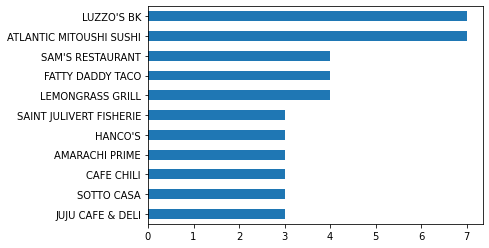

In [34]:
has_mice_this_zip["DBA"].value_counts()[10::-1].plot(kind="barh")



---



***Some SQL-like Manipulations***

## Selecting distinct values -- `drop_duplicates()`

We can do the equivalent of the SQL [SELECT DISTINCT](https://www.w3schools.com/sql/sql_distinct.asp) statement in Pandas using the **'.drop_duplicates()'** method in Pandas as follows:

In [35]:
(
    has_mice_this_zip
    .filter( items = ['DBA', 'BUILDING', 'STREET'])
    .drop_duplicates()
)

,DBA,BUILDING,STREET
3181,BARNES & NOBLE CAFE,106,COURT STREET
7217,SAN BLAS,140,MONTAGUE STREET
8382,SEAMORE'S,66,WATER STREET
9949,KOR TOR MOR,204,SMITH STREET
12773,LAYLA JONES,214,COURT STREET
...,...,...,...
224415,HUGE THAI,157,COURT STREET
227402,BIEN CUIT,120,SMITH STREET
230939,VINEGAR HILL HOUSE,72,HUDSON AVENUE
234570,FORTUNE HOUSE,82,HENRY STREET


## Sorting values -- `sort_values()`

And we can do the equivalent of SQL [ORDER BY](https://www.w3schools.com/sql/sql_orderby.asp) statement using the **'.sort_values()'** method in Pandas.

In [37]:
(
    has_mice_this_zip
    .sort_values("INSPECTION DATE", ascending=False)
    .head(15)
)

,DBA,BUILDING,STREET,INSPECTION DATE
33564,THE LITTLE SWEET CAFE,77B,HOYT STREET,2022-09-15
220387,LASSEN & HENNIGS,114,MONTAGUE STREET,2022-09-12
219444,MCDONALD'S,82,COURT STREET,2022-09-09
119430,PANDA DELIGHT CHINESE RESTAURANT,121,SMITH STREET,2022-09-07
3181,BARNES & NOBLE CAFE,106,COURT STREET,2022-08-24
231829,6TH WARD,166,SMITH STREET,2022-08-05
202521,BARNES & NOBLE CAFE,106,COURT STREET,2022-07-21
188874,BLUE COLLAR,187,COURT STREET,2022-07-08
103661,BUBUSAN,55,WATER STREET,2022-07-05
34970,HANCO'S,134,SMITH STREET,2022-07-05


In [38]:
(
    has_mice_this_zip
    .sort_values(["INSPECTION DATE","DBA"], ascending=[False,True])
    .head(15)
)

,DBA,BUILDING,STREET,INSPECTION DATE
33564,THE LITTLE SWEET CAFE,77B,HOYT STREET,2022-09-15
220387,LASSEN & HENNIGS,114,MONTAGUE STREET,2022-09-12
219444,MCDONALD'S,82,COURT STREET,2022-09-09
119430,PANDA DELIGHT CHINESE RESTAURANT,121,SMITH STREET,2022-09-07
3181,BARNES & NOBLE CAFE,106,COURT STREET,2022-08-24
231829,6TH WARD,166,SMITH STREET,2022-08-05
202521,BARNES & NOBLE CAFE,106,COURT STREET,2022-07-21
188874,BLUE COLLAR,187,COURT STREET,2022-07-08
103661,BUBUSAN,55,WATER STREET,2022-07-05
34970,HANCO'S,134,SMITH STREET,2022-07-05




---



## Defining New Columns -- `assign()` and `apply()`



### Using the `assign()` approach

The `assign` command applies a function to a dataframe and returns back a new dataframe with the new column(s).    


In the following example we will use the differences in lattitude and longitude from CityTech, square both and take the square root of their sum to get the distance 'as the crow flies' (or the shortest distance, regardless of obstacles) from the restuarant to CityTech.  This type of distance calculation could be used in determining all sites within a certain radius of a location.  It is not always a good measure of the distance to travel between sites, especially when the mode of transportation is by private automobile or public transportation. 

In [ ]:
import numpy as np

# We define a function that will take as input a dataframe df
# and returns back a new column. This function computes
# the distance (in miles) from CityTech, given the lat/lon of the 
# other location
def distance(df):
  CityTech_lat = 40.6973
  CityTech_lon = -73.9861

  # The calculation below is simply the Pythagorean theorem.
  # The normalizing values are just for converting lat/lon differences
  # to miles
  distance = ((df.Latitude-CityTech_lat)/0.0146)**2 + ((df.Longitude-CityTech_lon)/0.0196)**2
  return np.sqrt(distance)

# This function combines STREET/BUILDING/BORO/ZIPCODE columns into one address
def combine_address(df):
  return (df.BUILDING + ' ' + df.STREET + ', '  + df.ZIPCODE).str.upper()

In [ ]:
# First, let's use the `assign` function to create two new columns
# using the logic in the functions above,
(
  restaurants
  .assign(
      distance_from_CityTech = distance,
      address = combine_address
  )
  .filter(items = ['DBA','address','distance_from_CityTech'])
)

In [ ]:
# And let's eliminate duplicates and sort by distance
(
  restaurants
  .assign(
      distance_from_CityTech = distance,
      address = combine_address
  )
  .filter(items = ['DBA','address','distance_from_CityTech'])
  .query('distance_from_CityTech > 0') # eliminates NaN values from distance_from_CityTech
  .drop_duplicates()
  .sort_values('distance_from_CityTech')
  .head(20)
)



---



### Using the `apply` approach

The `apply` function allows the users to pass a function and apply it on every single row or column of a Pandas dataframe. 

In [ ]:
!sudo pip3 install -q -U geopy

from geopy import distance

# A bit more accurate distance calculation, which returns back
# the distance in miles. However, we cannot pass a dataframe
# to the function but only individual values
def distance_from_CityTech_geodesic(row):
  CityTech_lon = -73.9861
  CityTech_lat = 40.6973
  CityTech = (CityTech_lat, CityTech_lon)
  rest = (row.Latitude, row.Longitude)
  #if pd.isnull(row.Latitude) or pd.isnull(row.Longitude):
  #  return None
  return distance.distance(CityTech, rest).miles


In [ ]:
# We now create a smaller version of the dataset with just
# the names/address/lon/lat of the restaurants
rest_names_locations = (
    restaurants
    .assign(
      address = combine_address
    )
    .filter(items = ['CAMIS','DBA','address','Longitude', 'Latitude'])
    .query(' Longitude==Longitude ') # idiomatic expression for saying IS NOT NULL
    .query(' Latitude==Latitude ') # idiomatic expression for saying IS NOT NULL
    .drop_duplicates()
)

rest_names_locations

In [ ]:
# We will now apply the function distance_from_CityTech_geodesic 
# to every row of the dataset:
rest_names_locations.apply(distance_from_CityTech_geodesic, axis='columns')


In [ ]:
# We will now save the result into a new column
rest_names_locations['distance_from_CityTech']=rest_names_locations.apply(distance_from_CityTech_geodesic, axis='columns')

In [ ]:
# Let's see how many restaurants are within half a mile from NYU :)
(
    rest_names_locations
    .query('distance_from_CityTech < 0.5')
    .sort_values('distance_from_CityTech')
)



---



## Aggregation Function -- `agg()`

In [ ]:
restaurants['SCORE'].agg('mean')

In [ ]:
restaurants['SCORE'].agg(['mean','std','count','nunique'])

In [ ]:
restaurants.agg(
    {
        'SCORE': ['mean','std','count','nunique'],
        'CAMIS':  ['nunique','count']
     }
    )

In [ ]:
restaurants.agg(
        num_scored_violations = ('SCORE', 'count'),
        mean_score = ('SCORE', 'mean'),
        std_score  = ('SCORE', 'std'),
        num_entries = ('CAMIS',  'count'),
        num_restaurants = ('CAMIS',  'nunique'),
  )

## Calculating aggegates per groups -- `groupby()`

In [ ]:
restaurants.groupby('GRADE DATE').agg({'SCORE': 'mean'})

In [ ]:
(
  restaurants
  .groupby('GRADE DATE')
  .agg(
      score_mean = ('SCORE', 'mean'), 
      graded_restaurants = ('CAMIS', 'nunique')
    )
  .tail(500)
  .head(20)
)



---



## Pivot Tables

[Pivot tables](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) are one of the most commonly used exploratory tools, and in Pandas they are extremely flexible. 

For example, let's try to count the number of restaurants that are inspected every day. 

In [ ]:
# Count the number of CAMIS values that appear on each date

pivot = pd.pivot_table(
    data=restaurants,
    index="GRADE DATE",  # specifies the rows
    values="CAMIS",  # specifies the content of the cells
    aggfunc="count",  # we ask to count how many different CAMIS values we see
)

In [ ]:
pivot

#### Changing date granularity 

We can also use the [resample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) command to change the frequency from one day, to, say, 7 days. Then we can compute, say, the average (`mean()`) for these days, or the total number (`sum()`) of inspections.

In [ ]:
pivot.resample("1W").sum().tail(100)

#### Pivot Table with two (or more) variables)

We would like to break down the results by borough, so we add the `column` parameter.

In [ ]:
pivot2 = pd.pivot_table(
    data=restaurants,  #
    index="INSPECTION DATE",
    columns="BORO",
    values="CAMIS",
    aggfunc="count",
)
pivot2.head(10)

##### Deleting rows and columns

Now, you will notice that there are a few columns and rows that are just noise. The first row with date *'1900-01-01'* is clearly noise, and the *'0'* column is also noise. We can use the `drop` command in Pandas to drop these.

In [ ]:
# The axis='index' (or axis=0) means that we delete a row with that index value
pivot2 = pivot2.drop(pd.to_datetime("1900-01-01"), axis="index")

In [ ]:
# The axis='columns' (or axis=1) means that we delete a columns with that value
pivot2 = pivot2.drop("0", axis="columns")

In [ ]:
pivot2.tail(5)

## (Optional, FYI) Advanced Pivot Tables

We can also add multiple attributes in the index and columns. It is also possible to have multiple aggregation functions, and we can even define our own aggregation functions.

In [ ]:
# We write a function that returns the
# number of unique items in a list x
def count_unique(x):
    return len(set(x))


# We break down by BORO and GRADE, and also calculate
# inspections in unique (unique restaurants)
# and non-unique entries (effectuvely, violations)
pivot_advanced = pd.pivot_table(
    data=restaurants,  #
    index="GRADE DATE",
    columns=["BORO", "GRADE"],
    values="CAMIS",
    aggfunc=["count", count_unique],
)

# Take the total number of inspections (unique and non-unique)
agg = pivot_advanced.resample("1M").sum()

# Show the last 5 entries and show the transpose (.T)
agg.tail().T



---



# Exercises

## Exercise 1 - Average Score by Inspector

Now let's do the same exercise, but instead of counting the number of inspections, we want to compute the average score assigned by the inspectors. Hint: We will need to change the `values` and the `aggfunc` parameters in the `pivot_table` function above.

In [ ]:
# your code here

#### Solution 1 - Average Score by Inspector

In [ ]:
pivot = pd.pivot_table(
    data=restaurants,
    index="INSPECTION DATE",  # specifies the rows
    values="SCORE",  # specifies the content of the cells
    aggfunc="mean",  # compute the average SCORE
)